# PART 4 : LINE GRAPHS, HAMILTONIAN PATHS AND EULERIAN PATHS

## Step 1 Research

- An Eulerian path in a graph is a route that takes you through the graph, crossing each edge exactly once. A graph has an Eulerian path if and only if it is connected and has 0 or 2 vertices with an odd degree (number of edges connected to them).
A Hamiltonian path is a route that takes you through the graph, visiting each vertex exactly once. Finding a Hamiltonian path can be much more challenging than finding an Eulerian path.

- The line graph of a graph $G$, denoted as $L(G)$, is a new graph where each vertex represents an edge in $G$. In $L(G)$, two vertices are connected by an edge if and only if their corresponding edges in $G$ share a common vertex. The interesting connection between these concepts is that if you can find a Hamiltonian path in the line graph $L(G)$, this is equivalent to finding an Eulerian path in the original graph $G$.

## Step 2 Graph 

Imports

In [138]:
import networkx as nx
import matplotlib.pyplot as plt
import time

Create a complete graph of 5

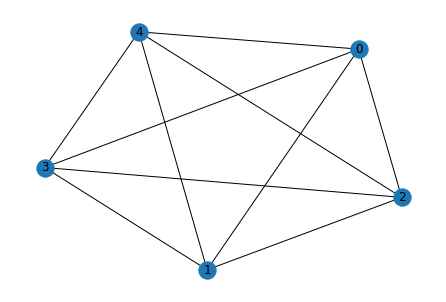

In [139]:
G = nx.complete_graph(n=5)
nx.draw(G, with_labels=True)


Check if it's eulerian and print the paths

In [140]:
if nx.is_eulerian(G):
    eulerian_path = list(nx.eulerian_circuit(G))
    print("Graph has Eulerian path:", eulerian_path)
else:
    print("Graph has no Eulerian path.")

Graph has Eulerian path: [(0, 4), (4, 3), (3, 2), (2, 4), (4, 1), (1, 3), (3, 0), (0, 2), (2, 1), (1, 0)]


Create a function with an optimized brute-force approach to check if a graph is Hamiltonian.

Complexite: $O(n! \times n^2)$

In [141]:
class Permutations:
    def __init__(self, elements):
        self.elements = elements
        self.n = len(elements)
        self.indices = list(range(self.n))
        self.cycles = list(range(self.n, 0, -1))
        self.first_call = True

    def __iter__(self):
        return self

    def __next__(self):
        if self.first_call:
            self.first_call = False
            return tuple(self.elements[i] for i in self.indices[:self.n])
        for i in reversed(range(self.n)):
            self.cycles[i] -= 1
            if self.cycles[i] == 0:
                self.indices[i:] = self.indices[i + 1:] + self.indices[i:i + 1]
                self.cycles[i] = self.n - i
            else:
                j = self.cycles[i]
                self.indices[i], self.indices[-j] = self.indices[-j], self.indices[i]
                return tuple(self.elements[i] for i in self.indices[:self.n])
        raise StopIteration

def is_hamiltonian(graph):
    nodes = list(graph.nodes)
    n = len(nodes)
    for path in Permutations(nodes):
        if all((path[i], path[i + 1]) in graph.edges or (path[i + 1], path[i]) in graph.edges for i in range(n - 1)):
            return True, list(path)
    return False, []


Show the result

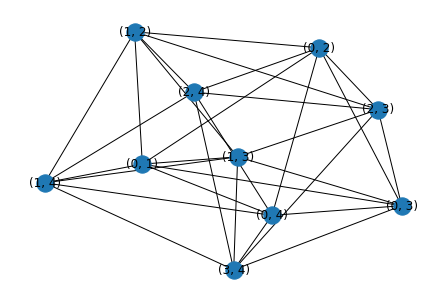

Time: 0.02293848991394043
Line graph has Hamiltonian path: [(1, 2), (1, 3), (3, 4), (0, 4), (1, 4), (2, 4), (2, 3), (0, 3), (0, 1), (0, 2)]


In [142]:
line_graph = nx.line_graph(G)
nx.draw(line_graph, with_labels=True)
plt.show()
time_start = time.time()
hamiltonian, path = is_hamiltonian(line_graph)
time_end = time.time()
print("Time:", time_end - time_start)
if hamiltonian:
    print("Line graph has Hamiltonian path:", path)
else:
    print("Line graph has no Hamiltonian path.")

## Step 3

From an algorithmic point of view, the Hamiltonian path problem is generally considered harder than the Eulerian path problem. This is because the Eulerian path problem can be solved in polynomial time using Fleury's algorithm or Hierholzer's algorithm, while the Hamiltonian path problem is NP-complete, meaning that no polynomial-time solution is known, and it is widely believed that no such solution exists. The difficulty of the Hamiltonian path problem lies in the fact that it requires exploring all possible combinations of vertices to find a path that visits each vertex exactly once, which is a combinatorially explosive problem.